In [1]:
# On importe les données
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 172k/172k [00:00<00:00, 592kB/s]

Extracting files...
Path to dataset files: /Users/mac/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [4]:
# On importe les données dans une data frame pandas
import pandas as pd
df = pd.read_csv("./customer_churn_dataset.csv")

In [14]:
# Describe pour voir les valeurs des données numériques
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
# Je ne remarque pas de valeur bizarre, par contre il faudra standardiser pour plus tard.

# Verifions maintenant les valeurs null
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
# Pas de valeur null

# Affichons les types des colonnes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
# Probleme total charges devrai être un float
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# On va donc le convertir en float
df = df.astype({"TotalCharges" : "float64"})

ValueError: could not convert string to float: ' ': Error while type casting for column 'TotalCharges'

In [20]:
# On va supprimer les lignes où total charges est : " "
df = df[df["TotalCharges"] != " "]

In [ ]:
# Et maintenant on refait la conversion
df = df.astype({"TotalCharges" : "float64"})

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


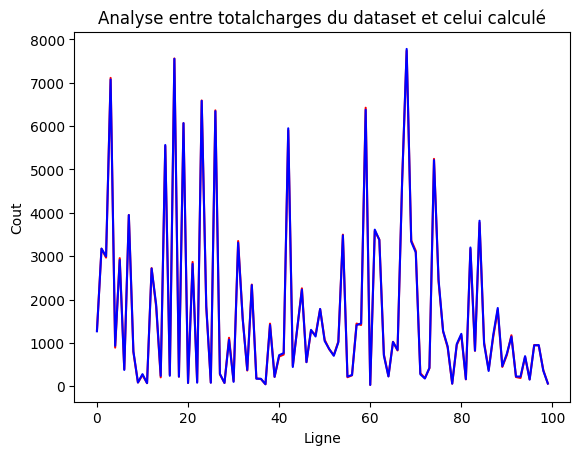

In [38]:
# Maintenant on souhaite garder que les lignes ou le totalcharges = monthlycharges*tenure (approximativement)
# Pour déterminer un seuil de tolérance, je vais afficher 2 plot, l'un des totalcharges du data set et l'autres des 
# total charges effectifs
import matplotlib.pyplot as plt

def diff_totalcharges(df):
    # On va prendre un échantillon 
    df_sample = df.sample(100)

    plt.plot(range(len(df_sample)), df_sample["TotalCharges"], color = "red")
    plt.plot(range(len(df_sample)), df_sample["tenure"] * df_sample["MonthlyCharges"], color = "blue")

    plt.title("Analyse entre totalcharges du dataset et celui calculé")
    plt.xlabel("Ligne")
    plt.ylabel("Cout")
    plt.show()

diff_totalcharges(df)


In [37]:
# ça a l'air de bien coller entre les deux en général, on va considérer un écart de 50$ comme problèmatique
# et donc à enlever du df

df = df[abs(df["TotalCharges"] - df["tenure"] * df["MonthlyCharges"]) <= 50]

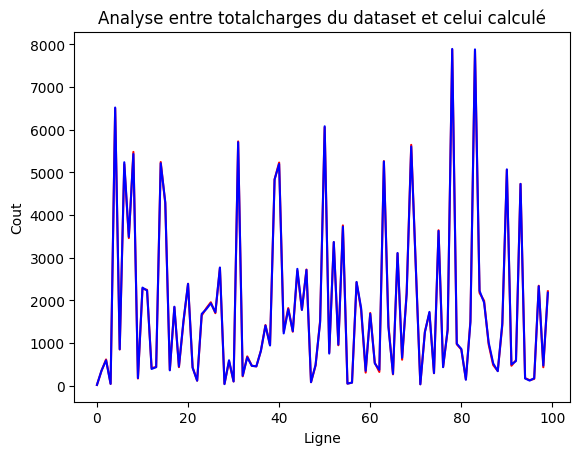

In [40]:
# On refait un plot
diff_totalcharges(df)

In [42]:
#Beaucoup mieux

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4710.000000,4710.000000,4710.0000,4710.000000
mean,0.148195,24.732909,58.5538,1548.256635
std,0.355331,23.147050,29.5460,1908.664662
min,0.000000,1.000000,18.2500,18.800000
25%,0.000000,4.000000,25.0000,199.525000
50%,0.000000,16.000000,60.0000,743.400000
75%,0.000000,42.000000,84.0500,2082.237500
max,1.000000,72.000000,118.2000,8547.150000


In [65]:
# On va effectuer maintenant un peu de nettoyage, en vérifiant bien que toutes les valeurs 
# Soient bien mise et écrite

print(df["gender"].unique()) # Que "Male" et "Female"
print(len(df["customerID"].unique())) # Tous les ID sont uniques
print(df["Partner"].unique()) # Que "yes" "no"
print(df["Dependents"].unique()) # Que "yes" "no"
print(df["PhoneService"].unique()) # Que "yes" "no"
print(df["MultipleLines"].unique()) # Que "yes" "no" (ici on peut check si tous les No PhoneService sont bien à no phone service ici)print(df["Partner"].unique()) # Que "yes" "no"

# Pour cela on peut check si le fait de pas avoir internet implique bien que tout le reste à no internet service
print(df["InternetService"].unique()) # Que ['DSL' 'Fiber optic' 'No']
print(df["OnlineSecurity"].unique()) # Que ['No' 'Yes' 'No internet service']
print(df["OnlineBackup"].unique()) # Que ['No' 'Yes' 'No internet service']
print(df["DeviceProtection"].unique()) # Que ['No' 'Yes' 'No internet service']
print(df["TechSupport"].unique()) # Que ['No' 'Yes' 'No internet service']
print(df["StreamingTV"].unique()) # Que ['No' 'Yes' 'No internet service']

#

print(df["Contract"].unique()) # Que ['Month-to-month' 'One year' 'Two year']

print(df["PaperlessBilling"].unique()) # Que "yes" "no"

print(df["PaymentMethod"].unique()) # Que "Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)"


print(df["Churn"].unique()) # Que "yes" "no"




['Female' 'Male']
4710
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'No internet service' 'Yes']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
['No' 'Yes']


In [66]:
# Pour un code plus modulable je vais effectuer toutes ces vérifications dans une fonction :
import random

def nettoyer_valeurs_invalides(df):
    valeurs_valides = {
        "gender": ["Male", "Female"],
        "Partner": ["Yes", "No"],
        "Dependents": ["Yes", "No"],
        "PhoneService": ["Yes", "No"],
        "MultipleLines": ["Yes", "No", "No phone service"],
        "InternetService": ["DSL", "Fiber optic", "No"],
        "OnlineSecurity": ["Yes", "No", "No internet service"],
        "OnlineBackup": ["Yes", "No", "No internet service"],
        "DeviceProtection": ["Yes", "No", "No internet service"],
        "TechSupport": ["Yes", "No", "No internet service"],
        "StreamingTV": ["Yes", "No", "No internet service"],
        "Contract": ["Month-to-month", "One year", "Two year"],
        "PaperlessBilling": ["Yes", "No"],
        "PaymentMethod": [
            "Electronic check", 
            "Mailed check", 
            "Bank transfer (automatic)", 
            "Credit card (automatic)"
        ],
        "Churn": ["Yes", "No"]
    }

    for col, valeurs in valeurs_valides.items():
        df[col] = df[col].apply(
            lambda x: x if x in valeurs else random.choice(valeurs)
        )

    return df


In [67]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4710.000000,4710.000000,4710.0000,4710.000000
mean,0.148195,24.732909,58.5538,1548.256635
std,0.355331,23.147050,29.5460,1908.664662
min,0.000000,1.000000,18.2500,18.800000
25%,0.000000,4.000000,25.0000,199.525000
50%,0.000000,16.000000,60.0000,743.400000
75%,0.000000,42.000000,84.0500,2082.237500
max,1.000000,72.000000,118.2000,8547.150000


In [ ]:
# j'ai fait une verification à la main donc la ça ne devrait rien changer
(nettoyer_valeurs_invalides(df)).describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4710.000000,4710.000000,4710.0000,4710.000000
mean,0.148195,24.732909,58.5538,1548.256635
std,0.355331,23.147050,29.5460,1908.664662
min,0.000000,1.000000,18.2500,18.800000
25%,0.000000,4.000000,25.0000,199.525000
50%,0.000000,16.000000,60.0000,743.400000
75%,0.000000,42.000000,84.0500,2082.237500
max,1.000000,72.000000,118.2000,8547.150000


In [71]:
# Verifions maintenant que : pas de phoneService -> pas de ligne multiple (et autres valeurs incohérentes)
def categorical_variable_verification(df):
    df = df[
        ~((df["PhoneService"] == "No") & (df["MultipleLines"] != "No phone service"))
    ]
    df = df[
        ~((df["InternetService"] == "No") & ((df["OnlineSecurity"] != "No internet service") | (df["OnlineBackup"] != "No internet service")
                                             | (df["DeviceProtection"] != "No internet service") | (df["TechSupport"] != "No internet service")
                                             | (df["StreamingTV"] != "No internet service")))
    ]
    return df
    
(categorical_variable_verification(df)).describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4710.000000,4710.000000,4710.0000,4710.000000
mean,0.148195,24.732909,58.5538,1548.256635
std,0.355331,23.147050,29.5460,1908.664662
min,0.000000,1.000000,18.2500,18.800000
25%,0.000000,4.000000,25.0000,199.525000
50%,0.000000,16.000000,60.0000,743.400000
75%,0.000000,42.000000,84.0500,2082.237500
max,1.000000,72.000000,118.2000,8547.150000


In [77]:
# Les données sont prêtes, passons sur power bi pour faire de l'exploration
df.to_csv("./cleaned_data.csv", index= False)

In [79]:
df = df.astype({"TotalCharges" : "int64", "MonthlyCharges" : "int64"})

In [80]:
# Les données sont prêtes, passons sur power bi pour faire de l'exploration
df.to_csv("./cleaned_data.csv", index= False)